# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

today = date.today().strftime("%m/%d/%Y")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [50]:
cities_df = pd.DataFrame({"cities": cities})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Temp"] = ""
cities_df["Cloudiness"] = ""
cities_df["Windspeed"] = ""
cities_df["Humidity"] = ""

cities_df.head()

,cities,Lat,Lng,Temp,Cloudiness,Windspeed,Humidity
0,sao filipe,,,,,,
1,port alfred,,,,,,
2,taoudenni,,,,,,
3,nassau,,,,,,
4,taolanaro,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
params = {"APPID": weather_api_key,
          "units": "imperial"}

base_url = "http://api.openweathermap.org/data/2.5/weather"

for index, row in cities_df.iterrows():
    
    city = row["cities"]
    
    params["q"] = str(city)
    
    print(f"Retrieving Results for Record {index}: {city}")
    response = requests.get(base_url, params=params).json()
    
    try:
        cities_df.loc[index,"Lat"] = response["coord"]["lat"]
        cities_df.loc[index,"Lng"] = response["coord"]["lon"]
        cities_df.loc[index,"Temp"] = response["main"]["temp"]
        cities_df.loc[index,"Humidity"] = response["main"]["humidity"]
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index,"Windspeed"] = response["wind"]["speed"]
    except (KeyError, IndexError):
        print("City Not Found")

Retrieving Results for Record 0: sao filipe
Retrieving Results for Record 1: port alfred
Retrieving Results for Record 2: taoudenni
Retrieving Results for Record 3: nassau
Retrieving Results for Record 4: taolanaro
City Not Found
Retrieving Results for Record 5: dabakala
Retrieving Results for Record 6: pisco
Retrieving Results for Record 7: balakhta
Retrieving Results for Record 8: albany
Retrieving Results for Record 9: srivardhan
Retrieving Results for Record 10: severo-kurilsk
Retrieving Results for Record 11: naze
Retrieving Results for Record 12: vardo
Retrieving Results for Record 13: bredasdorp
Retrieving Results for Record 14: qitaihe
Retrieving Results for Record 15: mataura
Retrieving Results for Record 16: hobart
Retrieving Results for Record 17: sentyabrskiy
City Not Found
Retrieving Results for Record 18: ushuaia
Retrieving Results for Record 19: berlevag
Retrieving Results for Record 20: bluff
Retrieving Results for Record 21: faanui
Retrieving Results for Record 22: for

Retrieving Results for Record 182: adrar
Retrieving Results for Record 183: deputatskiy
Retrieving Results for Record 184: porto novo
Retrieving Results for Record 185: ituango
Retrieving Results for Record 186: muros
Retrieving Results for Record 187: funadhoo
Retrieving Results for Record 188: sabha
Retrieving Results for Record 189: tecoanapa
Retrieving Results for Record 190: barrow
Retrieving Results for Record 191: ulladulla
Retrieving Results for Record 192: aksu
Retrieving Results for Record 193: san ramon de la nueva oran
Retrieving Results for Record 194: upernavik
Retrieving Results for Record 195: yar-sale
Retrieving Results for Record 196: guiratinga
Retrieving Results for Record 197: barentsburg
City Not Found
Retrieving Results for Record 198: chirongui
Retrieving Results for Record 199: rockhampton
Retrieving Results for Record 200: oksfjord
Retrieving Results for Record 201: rio grande
Retrieving Results for Record 202: flinders
Retrieving Results for Record 203: kaita

Retrieving Results for Record 363: kirakira
Retrieving Results for Record 364: san rafael
Retrieving Results for Record 365: saint-philippe
Retrieving Results for Record 366: luoyang
Retrieving Results for Record 367: gunjur
Retrieving Results for Record 368: srandakan
Retrieving Results for Record 369: sooke
Retrieving Results for Record 370: matozinhos
Retrieving Results for Record 371: unity
Retrieving Results for Record 372: zhanaozen
Retrieving Results for Record 373: saint-nazaire
Retrieving Results for Record 374: cherskiy
Retrieving Results for Record 375: karabanovo
Retrieving Results for Record 376: cadillac
Retrieving Results for Record 377: humaita
Retrieving Results for Record 378: vila franca do campo
Retrieving Results for Record 379: katsuura
Retrieving Results for Record 380: san julian
Retrieving Results for Record 381: san luis
Retrieving Results for Record 382: sahrak
City Not Found
Retrieving Results for Record 383: zaysan
Retrieving Results for Record 384: padang


Retrieving Results for Record 547: avera
Retrieving Results for Record 548: lolua
City Not Found
Retrieving Results for Record 549: antalaha
Retrieving Results for Record 550: dongsheng
Retrieving Results for Record 551: pochutla
Retrieving Results for Record 552: gharo
Retrieving Results for Record 553: miajadas
Retrieving Results for Record 554: oktyabrskoye
Retrieving Results for Record 555: gwadar
Retrieving Results for Record 556: ossora
Retrieving Results for Record 557: straumen
Retrieving Results for Record 558: hihifo
City Not Found
Retrieving Results for Record 559: ozu
Retrieving Results for Record 560: xiuyan
Retrieving Results for Record 561: ilulissat
Retrieving Results for Record 562: maceio
Retrieving Results for Record 563: acapulco
Retrieving Results for Record 564: hendijan
City Not Found
Retrieving Results for Record 565: mocambique
City Not Found
Retrieving Results for Record 566: omboue
Retrieving Results for Record 567: loreto
Retrieving Results for Record 568: s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
cities_df.replace("", np.nan, inplace=True)
cities_df.dropna(axis=0, inplace=True)
print(cities_df.count())

cities        573
Lat           573
Lng           573
Temp          573
Cloudiness    573
Windspeed     573
Humidity      573
dtype: int64


In [54]:
cities_df.head()

,cities,Lat,Lng,Temp,Cloudiness,Windspeed,Humidity
0,sao filipe,14.90,-24.50,78.39,16.0,8.37,77.0
1,port alfred,-33.59,26.89,65.91,25.0,20.83,67.0
2,taoudenni,22.68,-3.98,104.70,0.0,1.32,11.0
3,nassau,40.75,-73.58,51.85,100.0,16.20,94.0
5,dabakala,8.37,-4.43,86.76,15.0,3.98,59.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
humidity_df= cities_df.loc[cities_df["Humidity"] >=100]
humidity_df

,cities,Lat,Lng,Temp,Cloudiness,Windspeed,Humidity
19,berlevag,70.86,29.09,39.67,75.0,19.46,100.0
85,san patricio,28.02,-97.52,80.26,75.0,8.21,100.0
100,tasiilaq,65.61,-37.64,33.80,100.0,1.12,100.0
104,lufilufi,-13.87,-171.60,75.20,20.0,5.82,100.0
143,honiara,-9.43,159.95,75.20,20.0,6.73,100.0
243,hasaki,35.73,140.83,67.69,75.0,2.24,100.0
321,high level,58.52,-117.14,33.80,90.0,5.82,100.0
481,quesnel,53.00,-122.50,35.60,75.0,2.24,100.0
534,beli manastir,45.77,18.60,45.34,90.0,12.75,100.0
537,severodvinsk,64.56,39.83,48.20,90.0,4.47,100.0


In [56]:
#  Get the indices of cities that have humidity over 100%.
humidity_df.describe

<bound method NDFrame.describe of             cities    Lat     Lng   Temp  Cloudiness  Windspeed  Humidity
19        berlevag  70.86   29.09  39.67        75.0      19.46     100.0
85    san patricio  28.02  -97.52  80.26        75.0       8.21     100.0
100       tasiilaq  65.61  -37.64  33.80       100.0       1.12     100.0
104       lufilufi -13.87 -171.60  75.20        20.0       5.82     100.0
143        honiara  -9.43  159.95  75.20        20.0       6.73     100.0
243         hasaki  35.73  140.83  67.69        75.0       2.24     100.0
321     high level  58.52 -117.14  33.80        90.0       5.82     100.0
481        quesnel  53.00 -122.50  35.60        75.0       2.24     100.0
534  beli manastir  45.77   18.60  45.34        90.0      12.75     100.0
537   severodvinsk  64.56   39.83  48.20        90.0       4.47     100.0
569           riva  38.95  -76.58  58.87        90.0      11.41     100.0
575       coos bay  43.37 -124.22  57.25        90.0       4.70     100.0
604 

In [57]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
humidity_df.index

Int64Index([19, 85, 100, 104, 143, 243, 321, 481, 534, 537, 569, 575, 604], dtype='int64')

In [58]:
humidityclean_df= cities_df.loc[~(cities_df["Humidity"] >= 100)]
humidityclean_df

,cities,Lat,Lng,Temp,Cloudiness,Windspeed,Humidity
0,sao filipe,14.90,-24.50,78.39,16.0,8.37,77.0
1,port alfred,-33.59,26.89,65.91,25.0,20.83,67.0
2,taoudenni,22.68,-3.98,104.70,0.0,1.32,11.0
3,nassau,40.75,-73.58,51.85,100.0,16.20,94.0
5,dabakala,8.37,-4.43,86.76,15.0,3.98,59.0
...,...,...,...,...,...,...,...
619,buraydah,26.33,43.98,86.00,0.0,9.17,15.0
620,bilma,18.69,12.92,100.45,0.0,8.86,9.0
621,jinxiang,27.43,120.61,69.69,88.0,16.78,78.0
622,ostersund,63.18,14.64,42.80,40.0,5.82,81.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

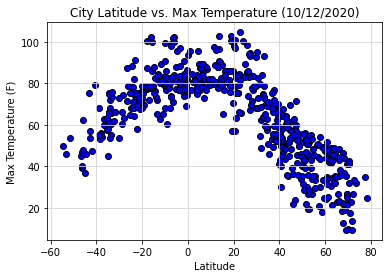

In [59]:
plt.scatter(humidityclean_df["Lat"], humidityclean_df["Temp"], marker="o",edgecolors='black', facecolors= "blue")

plt.title("City Latitude vs. Max Temperature (10/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

## Latitude vs. Humidity Plot

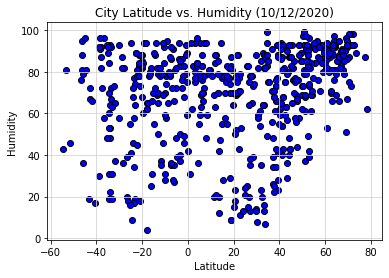

In [60]:
plt.scatter(humidityclean_df["Lat"], humidityclean_df["Humidity"], marker="o",edgecolors='black', facecolors= "blue")

plt.title("City Latitude vs. Humidity (10/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

## Latitude vs. Cloudiness Plot

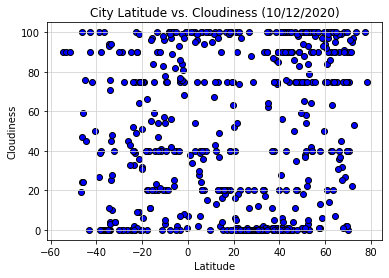

In [61]:
plt.scatter(humidityclean_df["Lat"], humidityclean_df["Cloudiness"], marker="o",edgecolors='black', facecolors= "blue")

plt.title("City Latitude vs. Cloudiness (10/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

## Latitude vs. Wind Speed Plot

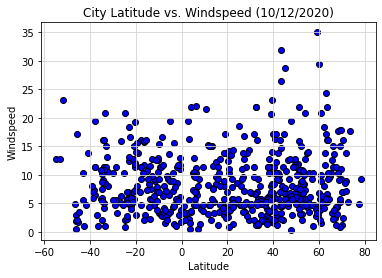

In [62]:
plt.scatter(humidityclean_df["Lat"], humidityclean_df["Windspeed"], marker="o",edgecolors='black', facecolors= "blue")

plt.title("City Latitude vs. Windspeed (10/12/2020)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

## Linear Regression

In [63]:
#defin northern hem
northern_df = humidityclean_df.loc[humidityclean_df["Lat"] >= 0.0]
northern_df.reset_index(inplace=True)

northern_df

,index,cities,Lat,Lng,Temp,Cloudiness,Windspeed,Humidity
0,0,sao filipe,14.90,-24.50,78.39,16.0,8.37,77.0
1,2,taoudenni,22.68,-3.98,104.70,0.0,1.32,11.0
2,3,nassau,40.75,-73.58,51.85,100.0,16.20,94.0
3,5,dabakala,8.37,-4.43,86.76,15.0,3.98,59.0
4,7,balakhta,55.38,91.60,33.66,100.0,5.14,92.0
...,...,...,...,...,...,...,...,...
370,619,buraydah,26.33,43.98,86.00,0.0,9.17,15.0
371,620,bilma,18.69,12.92,100.45,0.0,8.86,9.0
372,621,jinxiang,27.43,120.61,69.69,88.0,16.78,78.0
373,622,ostersund,63.18,14.64,42.80,40.0,5.82,81.0


In [64]:
#defin southern hem
southern_df = humidityclean_df.loc[humidityclean_df["Lat"] < 0.0]
southern_df.reset_index(inplace=True)

southern_df

,index,cities,Lat,Lng,Temp,Cloudiness,Windspeed,Humidity
0,1,port alfred,-33.59,26.89,65.91,25.0,20.83,67.0
1,6,pisco,-13.70,-76.22,65.10,90.0,5.82,82.0
2,13,bredasdorp,-34.53,20.04,75.20,94.0,16.11,31.0
3,15,mataura,-46.19,168.86,39.27,47.0,0.51,95.0
4,16,hobart,-42.88,147.33,57.13,90.0,10.29,67.0
...,...,...,...,...,...,...,...,...
180,605,taltal,-25.40,-70.48,64.69,33.0,4.65,55.0
181,608,trinidad,-14.83,-64.90,87.80,75.0,9.17,55.0
182,612,ambon,-3.70,128.18,77.00,40.0,10.29,94.0
183,613,labuhan,-6.88,112.21,83.01,89.0,7.20,72.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation factor for (Max Temp and Lat) is -0.86


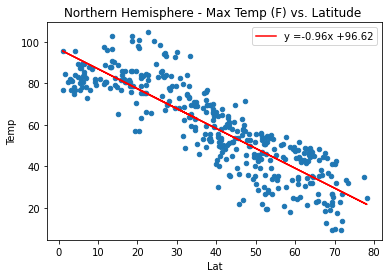

In [69]:
temp_north= northern_df["Temp"]
lat_north= northern_df["Lat"]

correlation =st.pearsonr (lat_north, temp_north)

print(f"The correlation factor for (Max Temp and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north, temp_north)
regress_values = lat_north * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

northern_df.plot(kind="scatter", x="Lat", y="Temp", 
                title="Northern Hemisphere - Max Temp (F) vs. Latitude ")

plt.plot(lat_north, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation factor for (Max Temp and Lat) is 0.74


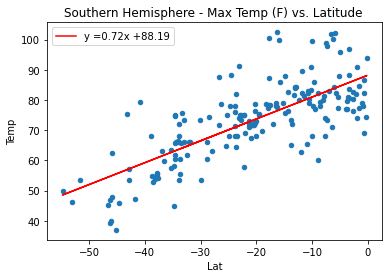

In [70]:
temp_south= southern_df["Temp"]
lat_south= southern_df["Lat"]

correlation =st.pearsonr (lat_south, temp_south)

print(f"The correlation factor for (Max Temp and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south, temp_south)
regress_values = lat_south * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

southern_df.plot(kind="scatter", x="Lat", y="Temp", 
                title="Southern Hemisphere - Max Temp (F) vs. Latitude ")

plt.plot(lat_south, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation factor for (Humidity and Lat) is 0.32


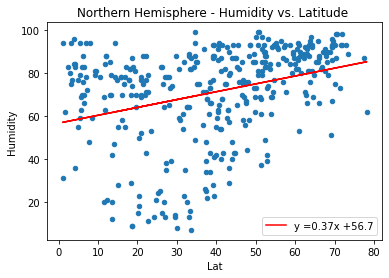

In [71]:
humidity_north= northern_df["Humidity"]
lat_north= northern_df["Lat"]

correlation =st.pearsonr (lat_north, humidity_north)

print(f"The correlation factor for (Humidity and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north, humidity_north)
regress_values = lat_north * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

northern_df.plot(kind="scatter", x="Lat", y="Humidity", 
                title="Northern Hemisphere - Humidity vs. Latitude ")

plt.plot(lat_north, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation factor for (Humidity and Lat) is 0.05


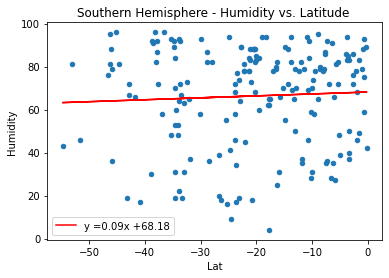

In [72]:
humidity_south= southern_df["Humidity"]
lat_south= southern_df["Lat"]

correlation =st.pearsonr (lat_south, humidity_south)

print(f"The correlation factor for (Humidity and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south, humidity_south)
regress_values = lat_south * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

southern_df.plot(kind="scatter", x="Lat", y="Humidity", 
                title="Southern Hemisphere - Humidity vs. Latitude ")

plt.plot(lat_south, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation factor for (Cloudiness and Lat) is 0.21


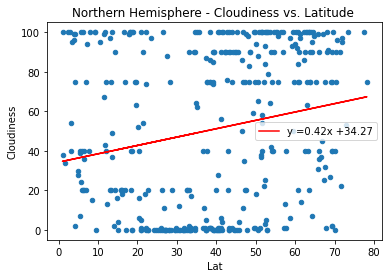

In [73]:
clouds_north= northern_df["Cloudiness"]
lat_north= northern_df["Lat"]

correlation =st.pearsonr (lat_north, clouds_north)

print(f"The correlation factor for (Cloudiness and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north, clouds_north)
regress_values = lat_north * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

northern_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                title="Northern Hemisphere - Cloudiness vs. Latitude ")

plt.plot(lat_north, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation factor for (Cloudiness and Lat) is 0.18


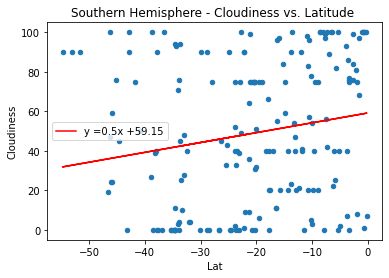

In [74]:
clouds_south= southern_df["Cloudiness"]
lat_south= southern_df["Lat"]

correlation =st.pearsonr (lat_south, clouds_south)

print(f"The correlation factor for (Cloudiness and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south, clouds_south)
regress_values = lat_south * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

southern_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                title="Southern Hemisphere - Cloudiness vs. Latitude ")

plt.plot(lat_south, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation factor for (Windspeed and Lat) is 0.09


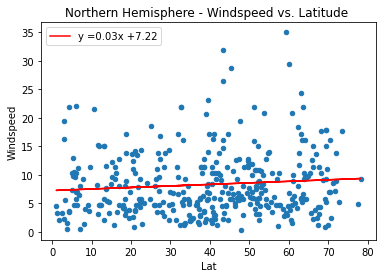

In [75]:
wind_north= northern_df["Windspeed"]
lat_north= northern_df["Lat"]

correlation =st.pearsonr (lat_north, wind_north)

print(f"The correlation factor for (Windspeed and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north, wind_north)
regress_values = lat_north * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

northern_df.plot(kind="scatter", x="Lat", y="Windspeed", 
                title="Northern Hemisphere - Windspeed vs. Latitude ")

plt.plot(lat_north, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation factor for (Windspeed and Lat) is -0.06


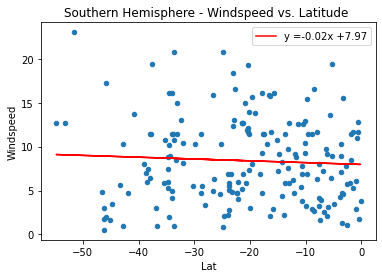

In [76]:
wind_south= southern_df["Windspeed"]
lat_south= southern_df["Lat"]

correlation =st.pearsonr (lat_south, wind_south)

print(f"The correlation factor for (Windspeed and Lat) is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south, wind_south)
regress_values = lat_south * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

southern_df.plot(kind="scatter", x="Lat", y="Windspeed", 
                title="Southern Hemisphere - Windspeed vs. Latitude ")

plt.plot(lat_south, regress_values, "r-", label= line_eq)
plt.legend()
plt.show()